# ObsID : 0945010135, SRCNUM : 28, Instru : EMOS2
**Simbad :** Active Galaxy Nucleus ([NAA2006] C761) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%405450903&Name=%5bNAA2006%5d%20C761&submit=submit

In [7]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

'\nplt.rcParams[\'figure.figsize\'] = [12,7]\n\nFit.statMethod = "chi"\nFit.nIterations = 100000\nFit.delta = 1e-4\nFit.criticalDelta = 1e-4\n'

## Load files

In [8]:
Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


2 spectra  in use
 
Spectral Data File: ObsID0945010135_SRCNUM28_EMOS2_spectrum_grp.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  1.863e-03 +/- 5.959e-04 (49.1 % total)


 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  1
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.133e+04 sec
 Using fit statistic: chi
 Using Background File                MOSbackground_spectrum.fits
  Background Exposure Time: 1.133e+04 sec
 Using Response (RMF) File            MOS.rmf for Source 1
 Using Auxiliary Response (ARF) File  MOS.arf



In [5]:
print(f"Number of coutnts : {1.133e+04*1.863e-03}")

Number of coutnts : 21.10779


The low number of counts indicates that we should use cstat instead of chi statistics.

## Plot spectrum

In [3]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 861.5, 664.5, -0.5)

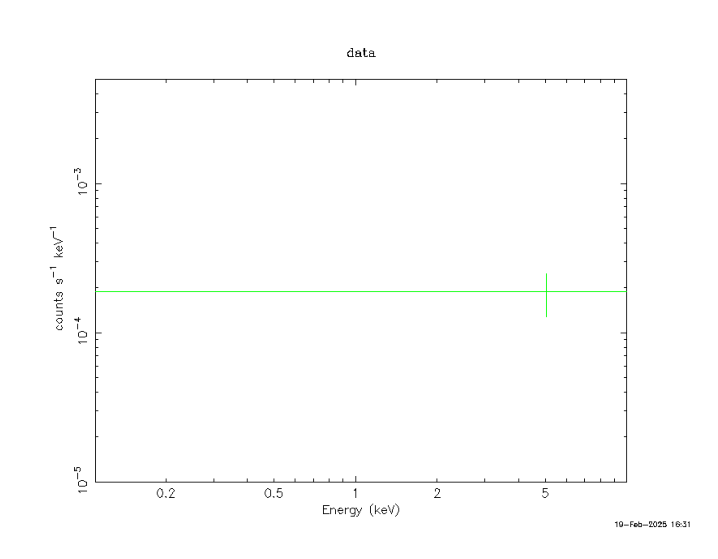

In [32]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [17]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.597141e+11     using 1 bins, spec

(-0.5, 859.5, 664.5, -0.5)

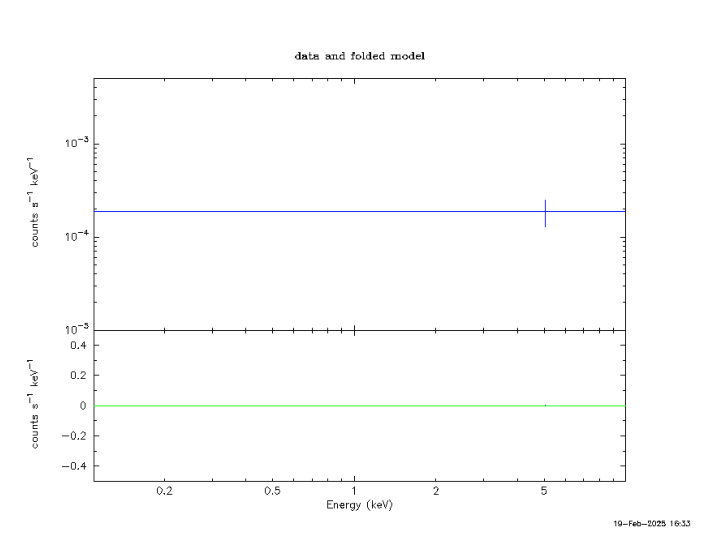

In [33]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### bremsstrahlung model

In [19]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.832485e+09     using 1 bins, spectrum 1.
                 Chi-Squared              9.832485e+09     using 1 bins, spectrum 2.
                 Chi-Squared              9.832485e+09     using 1 bins, spectrum 3.
                 Chi-Squared              9.832485e+09     using 1 bins, spectrum 4.
Total fit statistic                       3.932994e+10     with 1 d.o.f.

Test statistic : Chi-Squared              3.932994e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fi

(-0.5, 861.5, 664.5, -0.5)

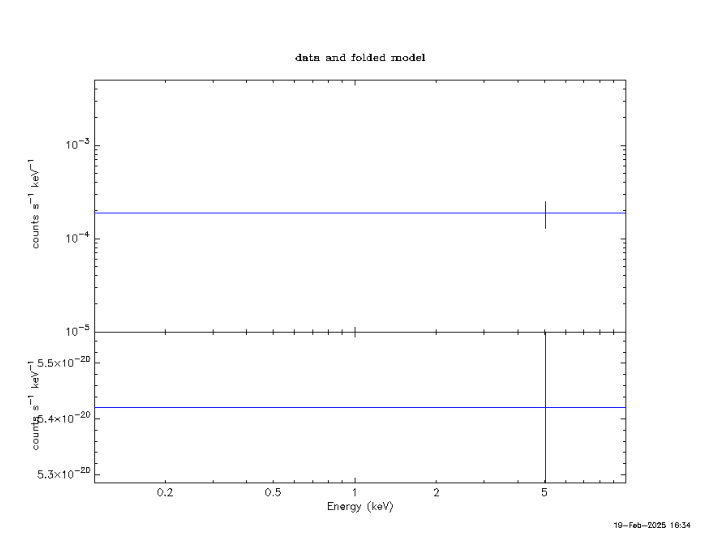

In [34]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [21]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.393186e+09     using 1 bins, spectrum 1.
                 Chi-Squared              1.393186e+09     using 1 bins, spectrum 2.
                 Chi-Squared              1.393186e+09     using 1 bins, spectrum 3.
                 Chi-Squared              1.393186e+09     using 1 bins, spectrum 4.
Total fit statistic                       5.572743e+09     with 1 d.o.f.

Test statistic : Chi

(-0.5, 861.5, 661.5, -0.5)

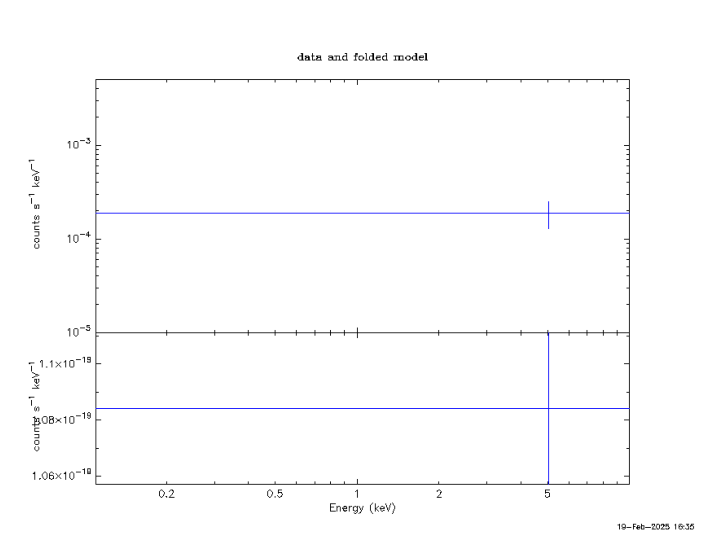

In [35]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [23]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.624192e+10     using 1 bins, spectrum 1.
                 Chi-Squared              5.624192e+10     using 1 bins, spectrum 2.
                 Chi-Squared              5.624192e+10     using 1 bins, spectrum 3.
                 Chi-Squared              5.624192e+10     using 1 bins, spectrum 4.
Total fit statistic                       2.249677e+11     with 1 d.o.f.

Test statistic : Chi-Squared              2.249677e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not 

(-0.5, 859.5, 661.5, -0.5)

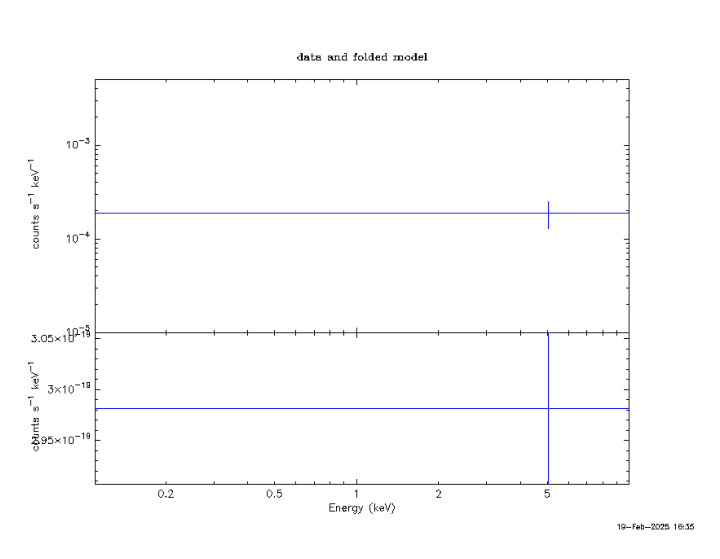

In [36]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [25]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2, 3, 4
Data Group Number: 1
 Model Flux 2.499e-05 photons (2.0908e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [5]:
Flux = 2.0908e-13 # ergs/cm^2/s

### ESASky

On ESASky, we observe 2 close sources a purple source and a green source. EPIC points to the system but GAIA has two pointers. https://sky.esa.int/esasky/?target=53.891302510636216%20-27.553110412917224&hips=XMM-Newton+EPIC+color&fov=0.091958931009&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033533.9-2733114XMM J033533.8-273311
- RA : 03h 35m 33.913s
- DEC : -27° 33' 11.20"

``2MASS``

- Name : 03353351-2733085
- RA : 03h 35m 33.519s
- DEC : -27° 33' 08.52"

``GAIA``

**Purple source :**
- Name : Gaia DR3 5081491845029366656
- RA : 03h 35m 33.912s
- DEC : -27° 33' 10.84"
- Parallax : -0.111 mas

**Green source :**
- Name : Gaia DR3 5081491845030888576
- RA : 03h 35m 33.506s
- DEC : -27° 33' 08.81"
- Parallax : 1.3353 mas

### Luminosity

In [11]:
"""GAIA purple source"""

P_mas = 0.111 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Purple source (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosity : {Luminosity} erg/s")

"""GAIA green source"""

P_mas = 1.3353 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s
print()
print(color.BOLD+"Green source (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosity : {Luminosity} erg/s")

Purple source (GAIA)
Distance : 2.77990990990991e+22 cm
Luminosity : 2.0304102580133548e+33 erg/s

Green source (GAIA)
Distance : 2.3108664719538683e+21 cm
Luminosity : 1.4030464797619726e+31 erg/s
